<a href="https://colab.research.google.com/github/IrfanDaffa10/Irfan-Daffayudha-Artificial-Intelegence-/blob/main/Heuristic_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-4-20e5bc920162>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


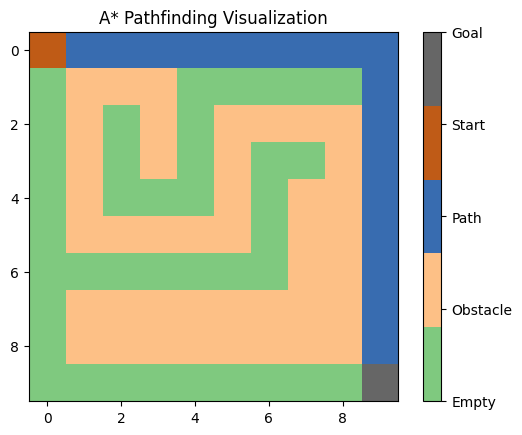

In [ ]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

1. Fungsi a_star(grid, start, goal)
Penjelasan
Algoritma A* digunakan untuk menemukan jalur terpendek dalam grid 2D dari start ke goal.
Algoritma ini menggunakan heuristik Manhattan (jumlah perbedaan baris dan kolom) untuk memperkirakan jarak dari suatu titik ke tujuan.
Gunakan priority queue (heapq) untuk memilih node dengan nilai f_score (perkiraan total biaya jalur).
Langkah-langkah utama
Inisialisasi

open_list → priority queue untuk menyimpan node yang sedang dievaluasi.
g_score → menyimpan jarak dari start ke setiap node.
f_score → menyimpan total estimasi biaya (fungsi heuristik).
came_from → menyimpan jejak node untuk rekonstruksi jalur.
Iterasi utama

Ambil node dengan f_score terendah dari open_list.
Jika node adalah goal, rekonstruksi jalur dan kembalikan.
Cek semua tetangga (atas, bawah, kiri, kanan).
Jika tetangga valid dan memberikan jalur lebih optimal, update nilai g_score dan f_score, lalu masukkan ke open_list.
Jika tidak ada jalur ditemukan, kembalikan None.

2. Fungsi visualize_path(grid, path, start, goal)
Penjelasan
Fungsi ini menggunakan Matplotlib untuk menampilkan grid dan jalur yang ditemukan.
Elemen grid diberi nilai sebagai berikut:
0 → Ruang kosong
1 → Rintangan
2 → Jalur yang ditemukan
3 → Titik awal
4 → Titik tujuan
Warna ditentukan oleh colormap "Accent".

3. Contoh Penggunaan
Grid ukuran 10x10 dengan beberapa rintangan (1).
Titik awal: (0,0)
Titik tujuan: (9,9)
Jika jalur ditemukan, jalur ditampilkan dalam bentuk array koordinat dan divisualisasikan.

4. Evaluasi Kode
Kelebihan
Menggunakan A*: Algoritma optimal untuk pencarian jalur.
Heuristik Manhattan: Cocok untuk pergerakan grid tanpa diagonal.
Efisien dengan heapq: heapq mempercepat pemilihan node terbaik.
Visualisasi dengan Matplotlib: Membantu memahami hasil pencarian jalur.

Kekurangan
Tidak mendukung pergerakan diagonal (hanya 4 arah: atas, bawah, kiri, kanan).
Tidak mempertimbangkan bobot berbeda untuk jalur (semua jalur memiliki bobot yang sama).
Tidak menangani grid dinamis (misalnya, jika rintangan berubah saat pencarian berjalan).

5. Saran Peningkatan
Menambahkan pergerakan diagonal, misalnya dengan arah tambahan (-1, -1), (-1, 1), (1, -1), (1, 1).
Mendukung bobot berbeda jika ingin simulasi lebih realistis (misalnya, beberapa jalur lebih lambat dilalui).
Menggunakan mode animasi Matplotlib untuk melihat proses pencarian jalur secara visual.

Kesimpulan
Kode ini merupakan implementasi A* yang baik untuk pencarian jalur dalam grid statis. Algoritmanya efisien, dan visualisasi memberikan gambaran jalur yang ditemukan. Namun, ada beberapa keterbatasan seperti tidak adanya pergerakan diagonal dan tidak mendukung bobot variabel. Jika ingin meningkatkan realisme, perlu modifikasi lebih lanjut.

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4), (4, 4), (5, 5), (6, 6), (6, 7), (6, 8), (7, 9), (8, 9), (9, 9)]


<ipython-input-1-ededdb108263>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


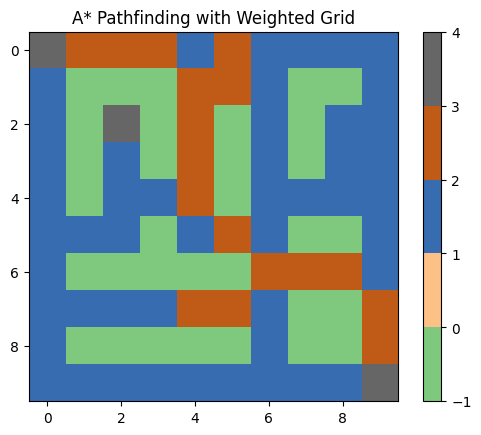

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def a_star(grid, start, goal):
    def heuristic(a, b):
        """ Menghitung heuristic (Manhattan Distance) """
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [
        (0, 1), (1, 0), (0, -1), (-1, 0),  # Atas, Bawah, Kiri, Kanan
        (-1, -1), (-1, 1), (1, -1), (1, 1) # Diagonal
    ]

    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] != -1:
                cost = 1 if direction in [(0, 1), (1, 0), (0, -1), (-1, 0)] else 1.4  # Bobot ekstra untuk diagonal
                tentative_g_score = g_score[current] + grid[neighbor[0]][neighbor[1]] * cost

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def visualize_path(grid, path, start, goal):
    grid = np.array(grid, dtype=float)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Titik awal
    grid[goal[0], goal[1]] = 4  # Titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    plt.imshow(grid, cmap=cmap, interpolation="nearest")
    plt.colorbar()
    plt.title("A* Pathfinding with Weighted Grid")
    plt.show()

# Definisi grid (0 = jalan biasa, angka lebih besar = lebih sulit dilalui, -1 = rintangan)
grid = [
    [1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
    [1, -1, -1, -1, 1, 2, 1, -1, -1, 1],
    [1, -1, 3, -1, 1, -1, 1, -1, 1, 1],
    [1, -1, 1, -1, 1, -1, 1, -1, 1, 1],
    [1, -1, 1, 1, 1, -1, 1, 1, 1, 1],
    [1, 1, 1, -1, 1, 1, 1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, 1, -1, -1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

start = (0, 0)
goal = (9, 9)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")
